# Shopify Data Science Intern Challenge - Summer 2022

#### Question 1a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

The Average Order Value (AOV) initially calculated was \\$3,145.13. Since the AOV is calculated by the average of the order amount, this value could be wrong because of fradulent orders placed by some users, or outliers being present within the dataset. In order to better evaluate the data, the dataset must not have any noticeable outliers, null values, or missing values as these are some of the common errors to why certain calculations are incorrect. Ensuring that these conditions are met will provide a better calculation to the AOV. In addition, under the assumption that the dataset has outliers and fradulent orders, the Median Order Value will provide a better representation of the AOV than the current calculation presented because medians are more robust to outliers than means.

#### Question 1b) What metric would you report for this dataset?

In this report, the better metric that I would report would be the Median Order Value instead of the Average Order Value. In most cases, the average would usually be the better calculation to find the central value of the order amount as it includes all of the data into the calculations. However, after cleaning the dataset, I found that 36.6% of the total orders had 1 item, 36.8% of the total orders had 2 items, 18.9% of the total orders had 3 items, 5.9% of the total orders had 4 items; thus as the order had more items the order frequency decreased. It is evident that in my analysis that the total items is positively skewed, and if analysts wanted to know what the average order value was, it's important to take into considerations other factors like total item frequency. Furthermore, for a skewed distribution the median is a better measure of the central tendency than the mean.

#### Question 1c) What is its value?

The Median Order Value calculated in the beginning and end of the analysis remained the same at \\$284.00. In addition, after cleaning the dataset, the AOV calculated was $300.16, which is significant improvement compared to the first AOV calculated (\\$3,145.13). Although the updated AOV is closer in value to the Median Order Value, since the data is positively skewed in terms of total ordered items, I still believe that the Median Order Value is a better metric than the Average Order Value for this dataset.




In [1]:
# Import necessary libaries needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_excel(r'./shopify_ds.xlsx')
print(data.head(10))
total_order_amt = data['order_amount'].sum()
print('\n')
print(data.info())
print('\n')
print(data.describe())

   order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   
5         6       58      882           138            1    credit_card   
6         7       87      915           149            1           cash   
7         8       22      761           292            2           cash   
8         9       64      914           266            2          debit   
9        10       52      788           146            1    credit_card   

               created_at  
0 2017-03-13 12:36:56.190  
1 2017-03-03 17:38:51.999  
2 2017-03-14 04:23:55.595  
3 2017-03-26 12:43:36.649  
4 2017-03-01 04:35:10.773  
5 2017

In [3]:
# Understanding the data
print('There are ', data['order_id'].nunique() ," unique order ID's")
print('There are ', data['shop_id'].nunique(), " unique shop ID's")
print('There are ', data['user_id'].nunique(), " unique user ID's")
print('There are ', data['payment_method'].nunique() , ' different payment methods in the data')
print('In this dataset there are ', data.shape[0], ' rows and ' ,data.shape[1], 'columns')
print('Sum of Order Amount column', total_order_amt)

There are  5000  unique order ID's
There are  100  unique shop ID's
There are  301  unique user ID's
There are  3  different payment methods in the data
In this dataset there are  5000  rows and  7 columns
Sum of Order Amount column 15725640


In [4]:
# Describe the Dataset
print('Describing the Dataset')
data.groupby('total_items')['order_amount'].describe()

Describing the Dataset


,count,mean,std,min,25%,50%,75%,max
total_items,,,,,,,,
1,1830.0,417.364481,2593.090627,90.0,132.0,153.0,169.0,25725.0
2,1832.0,750.215066,4760.572162,180.0,264.0,306.0,336.0,51450.0
3,941.0,1191.076514,7471.160149,270.0,402.0,459.0,504.0,77175.0
4,293.0,947.686007,5977.632918,360.0,520.0,592.0,660.0,102900.0
5,77.0,759.350649,161.174453,450.0,670.0,765.0,815.0,1760.0
6,9.0,17940.000000,51153.864136,774.0,786.0,948.0,960.0,154350.0
8,1.0,1064.000000,NaN,1064.0,1064.0,1064.0,1064.0,1064.0
2000,17.0,704000.000000,0.000000,704000.0,704000.0,704000.0,704000.0,704000.0


<AxesSubplot:title={'center':'Shop ID v Order Amount'}, xlabel='Shop ID', ylabel='Sum Amount Made'>

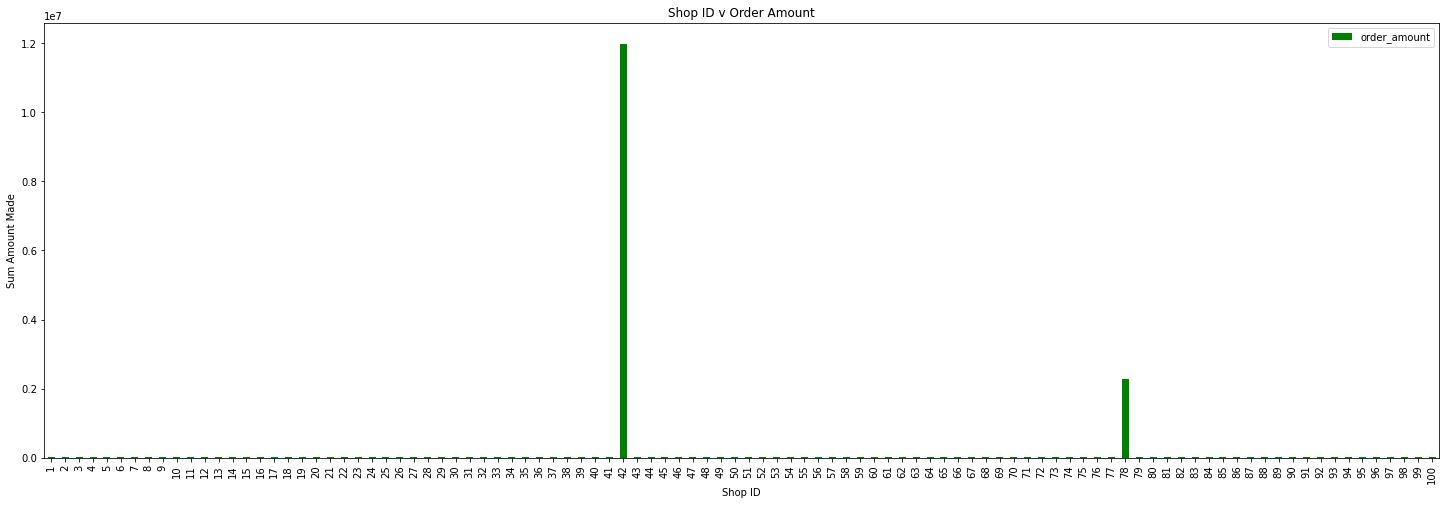

In [5]:
# Plot the Shop ID v Order Amount 
df = data.groupby('shop_id')['order_amount'].sum()
df.plot.bar(figsize=(25,8), xlabel = "Shop ID", ylabel = "Sum Amount Made", title = "Shop ID v Order Amount", legend = True, color = 'green')

From the graph shown above, shop 42 made considerably the most amount of money, second to shop 78. It is possible that our Average Order Value is considerably high due to these two shops making exponentially more than the rest of the other shops. 

<AxesSubplot:title={'center':'Shop ID v Sum of Total Items'}, xlabel='Shop ID', ylabel='Sum Total Items '>

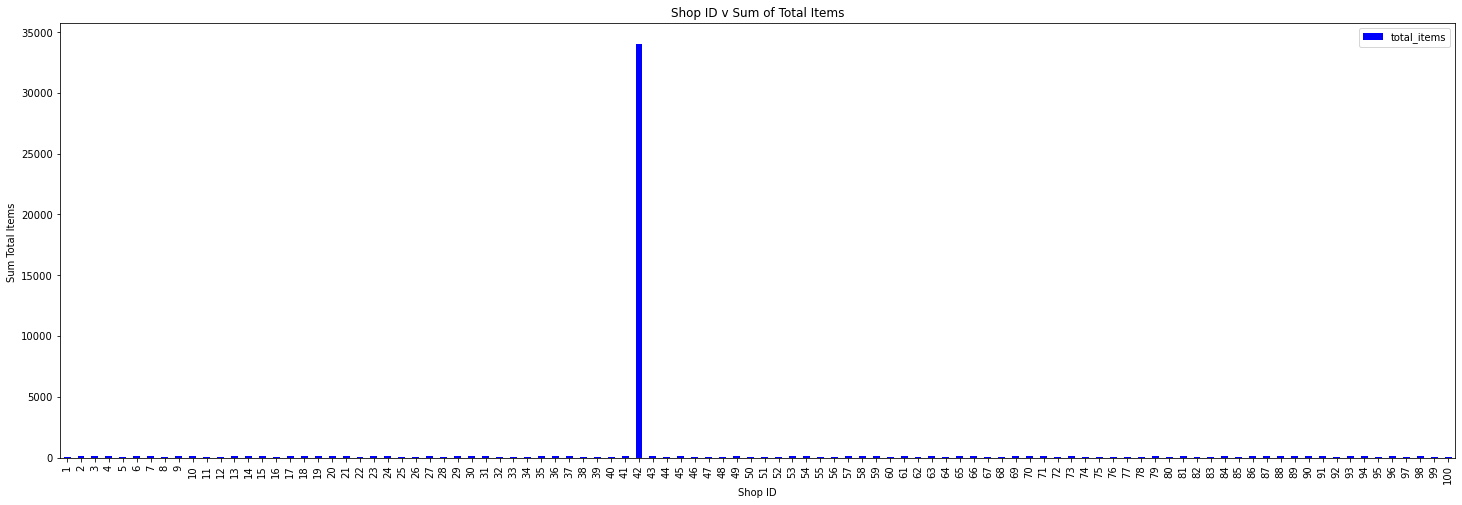

In [6]:
# Plot the Shop ID v Total Amount of Items bought
df = data.groupby('shop_id')['total_items'].sum()
df.plot.bar(figsize=(25,8), xlabel = "Shop ID", ylabel = "Sum Total Items ", title = "Shop ID v Sum of Total Items", legend = True, color = 'blue')

From the graph shown above, shop 42 had considerably more total items purchased at a store when compared to the rest of the stores. Shop 42's activity seems to be very fradulent, so shop 42 should be under investigation for the high amount of items and amount of money made.

In [ ]:
# Plot the User ID v Total Amount of Items bought
df = pd.DataFrame(data.groupby('user_id')['total_items'].sum())
df1 = df[:51]
df2 = df[50:101]
df3 = df[100: 151]
df4 = df[150:201]
df5 = df[200:251]
df6 = df[250:302]

# Split the plot 6 different ways for better readability
fig, axes = plt.subplots(nrows=2, ncols=3 ,figsize=(25,20))
df1.plot(kind = 'bar',ax=axes[0,0], xlabel = "User ID", ylabel = "Sum of Total Items", title = "User ID v Sum of Total Items (First 50)", color = 'blue')
df2.plot(kind = 'bar', ax=axes[0,1], xlabel = "User ID", ylabel = "Sum of Total Items", title = "User ID v Sum of Total Items (Second 50)", color = 'red')
df3.plot(kind = 'bar', ax=axes[0,2], xlabel = "User ID", ylabel = "Sum of Total Items", title = "User ID v Sum of Total Items (Third 50)", color = 'green')
df4.plot(kind = 'bar', ax=axes[1,0], xlabel = "User ID", ylabel = "Sum of Total Items", title = "User ID v Sum of Total Items (Fourth 50)", color = 'orange')
df5.plot(kind = 'bar', ax=axes[1,1], xlabel = "User ID", ylabel = "Sum of Total Items", title = "User ID v Sum of Total Items (Fifth 50)", color = 'purple')
df6.plot(kind = 'bar', ax=axes[1,2], xlabel = "User ID", ylabel = "Sum of Total Items", title = "User ID v Sum of Total Items (Sixth 50)", color = 'cyan')

<AxesSubplot:title={'center':'User ID v Sum of Total Items (Sixth 50)'}, xlabel='User ID', ylabel='Sum of Total Items'>

Moving from the top row to the bottom, left to right, something to notice straight off the bat is user 607 has by far the most amount of orders than any other user. This is very alarming and user 607 should be under investigation in the analysis as the user has made over 30,000 orders whereas every other documented user has less than 100 orders. From the second to the sixth plot, user 787, 847, 868, 932, and 969 have had the most amount orders made in their respective plots, and should be under further investigation in the analysis.

In [ ]:
# Plot the Total Items v Order Amount
df = data.groupby('total_items')['order_amount'].sum()
df.plot.bar(figsize=(10,6), xlabel = "Total Items", ylabel = "Sum Order Amount", title = "Total Items v Sum of Order", legend = True, color = 'blue')

# Understanding the Dataset

In this dataset, there are 5,000 rows and 7 columns with no null values. This dataset is recorded within the month of March 2017, and contains 5,000 unique order ID's, 100 unique shop ID's, 301 unique user ID's and payment method's recorded were cash, credit card or debit. After taking a look at the total items and order amount columns, I found have large values for our standard deviations, implying that the data points are spread out over a large range of values. Given that the Average Order Value is $3,145.13 and these stores are selling relatively affordable items, it can be implied that our analysis may be wrong because there are certain outliers within our data. 

From what I can tell in the dataset, I see that the median order amount for the number of items is, 1 item: 153.00 dollars, 2 items: 306.00 dollars, 3 items: 459.00 dollars, 4 items: 592.00 dollars, 5 items: 765.00 dollars, 6 items: 948.00 dollars, 8 items: 1064.00 dollars and for 2,000 items: 704,000.00 dollars. This deviates significantly from what we get as the average order amount for the number of items: 1 item: 417.36 dollars, 2 items: 750.22 dollars, 3 items: 1191.08 dollars , 4 items: 947.69 dollars, 5 items: 759.35 dollars, 6 items: 17940.00 dollars, 8 items: 1064.00 dollars, 2,000 items: 704,000.00 dollars. 

In addition, shop 42 made the most amount of money, second to shop 78 and shop 42 had the most total items purchased compared to the other shops. It is possible that our Average Order Value is considerably high due to these two shops making exponentially more than the rest of the other shops. Also, user's 607, 787, 847, 868, 932, and 969 should be under investigation as these user's have made the most amount of orders in their respective plots shown above.

My assumption on why there is a large discrepancy between the median and the average order amount is due to the max value for the total number of items, certain shops making and selling more orders of shoes and certain user's purchasing a larger amount of orders. Hence, the average initially calculated is incorrect because the average order value includes outliers such as the ones described above and should be removed from the analysis to generate a better answer for the Average Order Value (AOV). 

A noteable mention, excluding 8 or more total item orders, in this dataset is the order amount based on the total number of items ordered is positively skewed, this would mean that the median is a better metric to find the central value in terms of the order amount than the mean.

# Identifying the Outliers within the Data

In [ ]:
# Function for calculating extreme outliers based on boxplot analysis

# Based on boxplot analysis, extreme outliers are considered to be datapoints that are more extreme than (Q1 - 3*IQR or Q3 + 3*IQR)
def extreme_outliers(sub_df, IQR, Q1, Q3, df_extreme_outlier = pd.DataFrame(), data = data):
    for index, row in sub_df.iterrows():
        # If the order amount is less than or greater, it's considered an extreme outlier, and we will remove this from the dataset
        if (row['order_amount'] < (Q1 - 3*IQR)) or (row['order_amount'] > (Q3 + 3*IQR)): 
            df_extreme_outlier = pd.concat([df_extreme_outlier,data.loc[[index]]], ignore_index = True)
    
    # returned dataframe will be all the outliers found based on this formula
    return (df_extreme_outlier)

In [ ]:
# Function for calculating the percentage of the number of extreme outlier orders based on the number of total orders in the respective total number of items bought
def percentage_calc(df_extreme_outlier, outlierVal, num_items):
    counter = 0 
    for index, row in df_extreme_outlier.iterrows():
        if row['order_amount'] == outlierVal:
            counter += 1
        numFreq = (counter / data[data['total_items'] == num_items].shape[0])*100
    return ('The frequency of orders worth $' + str(outlierVal) + ' based on the total number of orders with ' + str(num_items) + ' item is: {:.2f}%' .format(numFreq))

In [ ]:
# Function for dropping extreme outlier rows, no return value
def drop_outliers(num_items, outlier_value):
    for index,row in data.iterrows():
        if row['total_items'] == num_items and row['order_amount'] == outlier_value:
            indexNames = data[(data['total_items'] == num_items) & (data['order_amount'] == outlier_value)].index
            data.drop(indexNames , inplace=True)

In [ ]:
# Dataframe for the amount of total_items grouped by number of items
df_items = data['total_items'].value_counts()
df_items = pd.DataFrame(df_items).sort_index()
df_items

In [ ]:
# Describe the Total Items columns in the dataset
print('Describing the total items')
data['total_items'].describe()

In [ ]:
# Graph out the results
print(data['total_items'].value_counts().sort_index().plot(kind='barh', xlabel = "Total Items", title = "Total Items v Total Item Count", figsize = (10,6)))

In [ ]:
# Check the shop ID's and user ID's to see where the 2,000 orders are coming from
df_outlier_2000 = pd.DataFrame()
for index,row in data.iterrows():
    if row['total_items'] == 2000:
        df_outlier_2000 = pd.concat([df_outlier_2000,data.loc[[index]]], ignore_index = True)
        
df_2000 = pd.DataFrame({'Outlier Amount ($)':df_outlier_2000.groupby('shop_id')['order_amount'].sum()})
df_outlier_2000

In [ ]:
# From the outlier dataframe above, we see that user_id: 607 has made 17 purchases of 2000 items, each purchase worth $704,000. Let's remove this from our dataset
data.drop(data.index[data['user_id'] == 607], inplace=True)
data.describe()

In [ ]:
# Boxplot State of the Current Dataset
print('Describing the Dataset')
data.groupby('total_items')['order_amount'].describe()

I believe that every order that had more than 8 total items would be considered to be fraud, as each transaction was the same amount, and came from the same user and shop. After removing these rows, I believe that there are more fradulent orders in this dataset. I will now check orders with 1 total item and make my way down to the 6. I won't check orders with 8 total items because there is only 1 order with 8 items totalling \\$1064.00. Under the assumption that the median price of shoe is roughly around the average price of the shoe (\\$153.00 derived in the beginning of the analysis) a total of 8 items would cost \\$1224.00 which is not far off from what the total of 8 items costed in the analysis (\\$1064.00), which is why I believe that the order with 8 total items is not fradulent.

In [ ]:
# Subset of data with 1 total item
sub_df_1 = data[data['total_items'] == 1]
sub_df_1.reset_index()
# IQR is calculated by Q3 - Q1 (169 - 132 = 37) based on current findings
IQR = 37
df_extreme_outlier_1 = extreme_outliers(sub_df_1, IQR, 132, 169)
# results of extreme outliers for orders with 1 total item
print("Dataframe for 1 Item")
df_1 = pd.DataFrame({'Outlier Amount ($)':df_extreme_outlier_1.groupby('shop_id')['order_amount'].sum()})
print(df_1)
# Calculate the percentage
print(percentage_calc(df_extreme_outlier_1, outlierVal = 352, num_items = 1))
print(percentage_calc(df_extreme_outlier_1, outlierVal = 25725, num_items = 1))
print('\n')


# Subset of data with 2 total item
sub_df_2 = data[data['total_items'] == 2]
sub_df_2.reset_index()
# IQR is calculated by Q3 - Q1 (336 - 264 = 72) based on current findings
IQR = 72
df_extreme_outlier_2 = extreme_outliers(sub_df_2, IQR, 264, 336)
# Results of extreme outliers for orders with 2 total item
print("Dataframe for 2 Items")
df_2 = pd.DataFrame({'Outlier Amount ($)':df_extreme_outlier_2.groupby('shop_id')['order_amount'].sum()})
print(df_2)
# Calculate the Percentage
print(percentage_calc(df_extreme_outlier_2, outlierVal = 704, num_items = 2))
print(percentage_calc(df_extreme_outlier_2, outlierVal = 51450, num_items = 2))
print('\n')


# Subset of data with 3 total item
sub_df_3 = data[data['total_items'] == 3]
sub_df_3.reset_index()
# IQR is calculated by Q3 - Q1 (504 - 402 = 102) based on current findings
IQR = 102
df_extreme_outlier_3 = extreme_outliers(sub_df_3, IQR, 402, 504)
# Results of extreme outliers for orders with 3 total item
print("Dataframe for 3 Items")
df_3 = pd.DataFrame({'Outlier Amount ($)':df_extreme_outlier_3.groupby('shop_id')['order_amount'].sum()})
print(df_3)
# Calculate the Percentage
print(percentage_calc(df_extreme_outlier_3, outlierVal = 1056, num_items = 3))
print(percentage_calc(df_extreme_outlier_3, outlierVal = 77175, num_items = 3))
print('\n')


# Subset of data with 4 total item
sub_df_4 = data[data['total_items'] == 4]
sub_df_4.reset_index()
# IQR is calculated by Q3 - Q1 (660 - 520 = 140) based on current findings
IQR = 140
df_extreme_outlier_4 = extreme_outliers(sub_df_4, IQR, 660, 520)
# Results of extreme outliers for orders with 4 total item
print("Dataframe for 4 Items")
df_4 = pd.DataFrame({'Outlier Amount ($)':df_extreme_outlier_4.groupby('shop_id')['order_amount'].sum()})
print(df_4)
# Calculate the Percentage
print(percentage_calc(df_extreme_outlier_4, outlierVal = 1408, num_items = 4))
print(percentage_calc(df_extreme_outlier_4, outlierVal = 102900, num_items = 4))
print('\n')


# Subset of data with 5 total item
sub_df_5 = data[data['total_items'] == 5]
sub_df_5.reset_index()
# IQR is calculated by Q3 - Q1 (815 - 670 = 145) based on current findings
IQR = 145
df_extreme_outlier_5 = extreme_outliers(sub_df_5, IQR, 670, 815)
# Results of extreme outliers for orders with 5 total item
print("Dataframe for 5 Items")
df_5 = pd.DataFrame({'Outlier Amount ($)':df_extreme_outlier_5.groupby('shop_id')['order_amount'].sum()})
print(df_5)
# Calculate the Percentage
print('\n')
print(percentage_calc(df_extreme_outlier_5, outlierVal = 1760, num_items = 5))


# Subset of data with 6 total item
sub_df_6 = data[data['total_items'] == 6]
sub_df_6.reset_index()
# IQR is calculated by Q3 - Q1 (960 - 786 = 174) based on current findings
IQR = 174
df_extreme_outlier_6 = extreme_outliers(sub_df_6, IQR, 786, 960)
# Results of extreme outliers for orders with 6 total item
print("Dataframe for 6 Items")
df_6 = pd.DataFrame({'Outlier Amount ($)':df_extreme_outlier_6.groupby('shop_id')['order_amount'].sum()})
print(df_6)
# Calculate the Percentage
print(percentage_calc(df_extreme_outlier_6, outlierVal = 154350, num_items = 6))
print('\n')

# Grab all the outlier dataframes, and concatenate them all into one
dfList = [df_extreme_outlier_1,df_extreme_outlier_2,df_extreme_outlier_3,df_extreme_outlier_4,df_extreme_outlier_5,df_extreme_outlier_6, df_outlier_2000]
outlier_df = pd.concat(dfList)
print('Dataframe of all Fradulent Orders Detected')
outlier_df

In [ ]:
# Fraud money based on total items
fraud_detected = pd.DataFrame({'Total Item = 1' : df_1['Outlier Amount ($)'], 'Total Item = 2': df_2['Outlier Amount ($)'], 'Total Item = 3': df_3['Outlier Amount ($)'], 'Total Item = 4': df_4['Outlier Amount ($)'], 'Total Item = 5': df_5['Outlier Amount ($)'], 'Total Item = 6': df_6['Outlier Amount ($)'], 'Total Items = 2000': df_2000['Outlier Amount ($)']}).replace(np.nan, 0)
fraud_detected['Total Fraud ($)'] = fraud_detected.sum(axis=1)
fraud_detected['Fraud %'] = round(((fraud_detected['Total Fraud ($)']/total_order_amt))*100,2)
fraud_detected

From my results, fraud purchases were mainly detected at shop 42 or 78. Aside from the abnormal spending for some users, there seems to be no connection between the date and time of the purchase with the user's fraud spending habits. Furthermore, shop 42 and 78 are under investigation as these two stores seem to be the main contributor to the unreasonably high user spending in our dataset. 

Furthermore, I will remove orders from the dataset that cost: \\$352 and \\$22,725, \\$704 and \\$51,450, \\$1,056 and \\$77,175, \\$1,408 and \\$102,900, \\$1,760 and \\$154,350 because the first two order values are 0.82% and 1.04% of the total number of 1 item orders, the second two order values are 0.71% and 0.87% of the total number of 2 item orders, the third two order values are 0.32% and 0.96% of the total number of 3 item orders, the fourth two order values are 0.68% and 0.34% of the total number of 4 item orders, the fifth this order value is 1.30% of the total number of 5 item orders, and the sixth order value is 11.11% of the total number of 6 item orders, respectively. These have values have also been classified as extreme outliers in our dataset.

In addition, the fradulent purchases of shop 42 had accounted for \\$11,990,716 and shop 78 accounted for \\$2,263,800, which were 76.25% and 14.40% of the total order amount initially calculated. Therefore, by my calculations, 90.65% ((shop 42 + shop 72)/(total_order_amt = \\$15,725,640) = \\$14,254,516/\\$15,725,640) of the total order amount collected were considered fraudlent purchases and only 9.35% (\\$1,471,124/(total_order_amt = \\$15,725,640)) of the order amount column would be used in further calculations.

In [ ]:
# Drop the outliers
drop_outliers(1, 352)
drop_outliers(1, 25725)
drop_outliers(2, 704)
drop_outliers(2, 51450)
drop_outliers(3, 1056)
drop_outliers(3, 77175)
drop_outliers(4, 1408)
drop_outliers(4, 102900)
drop_outliers(5, 1760)
drop_outliers(6, 154350)

In [ ]:
data.describe()

In [ ]:
print("After cleaning the dataset, I removed 97 rows and there are ", data.shape[0], " rows remaining.")
data.groupby('total_items')['order_amount'].describe()

In [ ]:
data.describe()

In [ ]:
# Dataframe to show the relationship between the user id and number of times outliers were detected, only which user's have committed fraud more than once 
user_fraud = pd.DataFrame({'fraud_count' : outlier_df['user_id'].value_counts(), 'total_fraud_$': outlier_df.groupby('user_id')['order_amount'].sum()}).reset_index()
user_fraud.rename(columns = {'index': 'user_id'}, inplace = True)
df_fraud = user_fraud[user_fraud['fraud_count'] > 1]

# I want to see how many orders the user has made in total in comparison to the amount of fraudulent orders they've made
counter = 0
money_spent = 0 # this value does not include any fraud value
total_order = []
total_money_spent = []
for _, fraud_row in df_fraud.iterrows():
    for __, data_row in data.iterrows():
        if fraud_row['user_id'] == data_row['user_id']:
            counter += 1
            money_spent += data_row['order_amount']
    # store money spent in a list
    total_money_spent.append(money_spent)
    money_spent = 0
    
    # Add 2 to the counter as these user's have only made 2 fraudulent purchases, and reset the counter back to zero for the next value in comparison
    total_order.append(counter) 
    counter = 0
    
# Final Calculations
df_fraud['total_valid_order'] = total_order
df_fraud['total_valid_$'] = total_money_spent
df_fraud['total_spent_$'] = df_fraud['total_fraud_$'] + df_fraud['total_valid_$']
df_fraud['total_order'] = df_fraud['total_valid_order'] + df_fraud['fraud_count']
df_fraud['percent_fraud'] = round(df_fraud['total_fraud_$'] / df_fraud['total_spent_$'],2) * 100
df_fraud['percent_valid'] = round(df_fraud['total_valid_$'] / df_fraud['total_spent_$'],2) * 100

# Reorganize Dataframe
df_fraud = df_fraud[["user_id", "fraud_count", "total_valid_order", "total_order", "total_fraud_$", "total_valid_$", "total_spent_$", "percent_valid", "percent_fraud"]].reset_index()
df_fraud.drop('index', axis = 'columns')

In [ ]:
# Plot the fraud found in the data
df = pd.DataFrame(dict(graph = df_fraud['user_id'].tolist(), valid = df_fraud['percent_valid'], fraud = df_fraud['percent_fraud'])) 

ind = np.arange(len(df))
width = 0.4
fig, ax = plt.subplots()

ax.barh(ind, df.valid, width, color='red', label='Valid')
ax.barh(ind + width, df.fraud, width, color='blue', label='Fraud')

ax.set(yticks=ind + width , yticklabels = df.graph, ylim=[2*width - 0.1, len(df)])
ax.legend()

plt.show()

In [ ]:
# Show the Relation of the total amount of items ordered and percentage based on the total item count
df_items = data['total_items'].value_counts()
df_items = pd.DataFrame(df_items).sort_index()
df_items['item_num'] = [1,2,3,4,5,6,8]

# Calculate the percentage of total item 1 to 8 to the total amount of items bought in the dataset
total_items = df_items['total_items'].sum()
percent_total = []
for i in df_items['total_items']:
    percent_total.append(round(i/total_items * 100, 1))
df_items['percent_total_%'] = percent_total
df_items = df_items[["item_num","total_items","percent_total_%"]]
df_items.drop('item_num', axis = 'columns')


In [ ]:
# Graph out the results from the Relation of the total amount of items ordered and percentage based on the total item count
plt.pie(df_items['percent_total_%'], labels = df_items['item_num'])
plt.legend()
plt.show()

## Conclusion: Identified Outliers

After further investigation on the outliers, I have detected 97 rows of extreme outliers based on my boxplot analysis. Extreme outliers are defined to be datapoints that are more extreme than ( value < (Q1 - 3xIQR) or value > (Q3 + 3xIQR) ) where IQR is the Interquartile range from the first quadrant to the third quadrant. The source of the outliers come from primarily 2 shops, shop 42 and shop 78, as they have documented unusually large spending from users. Although these stores have shown fradulent activity, removing these stores would not be beneficial in the analysis of the dataset as I would be removing validated purchases that may affect the Average and Median Order Value, hence I will only remove the rows where outliers were detected. Removing these data points provided a more reasonable amount on the Average Order Value which was \\$300.15 from $3,145.13 while the Median Order Value stayed the same (\\$284.00). 

Aside from user id 607 who had 17 orders of 2,000 items, each purchase order \\$704,000, there were no users detected that made more than 2 fradulent purchases but users: 739, 770, 819, and 868 should be flagged for future fraud purchases while users: 756, 855, 946, 962 and 970 should be banned from making additional purchases. My reasoning for flagging these users in the future for fraud purchases is due to the percentage of money spent on valid orders. Since these user's valid purchases were greater than 60% of the total money spent at the sneaker shop, it's hard to determine whether these user's knowingly committed fraud or spent more on the shoe than usual. On the other hand, the user's that should be banned from making additional purchases spent less than 20% on valid purchases and it can be implied that these user's knew they were committing fraud.